In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import decartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [55]:
path = "Rat_Sightings.csv"
df = pd.read_csv(path, low_memory=False)

df = df[["Created Date", "Closed Date", "Location Type", "Incident Zip", "Incident Address", "City", "Borough", "Latitude", "Longitude", "Location"]]
df.sort_values(by=['Created Date'], inplace=True)
display(df)

df['Location Type'].unique()

df['Borough'].unique()




,Created Date,Closed Date,Location Type,Incident Zip,Incident Address,City,Borough,Latitude,Longitude,Location
159386,01/01/2010 02:15:27 PM,NaN,Vacant Building,11218.0,900 CONEY ISLAND AVENUE,BROOKLYN,BROOKLYN,40.635654,-73.967757,"(40.63565426900362, -73.96775698011807)"
158069,01/01/2010 03:05:37 PM,NaN,3+ Family Apt. Building,11377.0,31-14 58 STREET,WOODSIDE,QUEENS,40.756987,-73.903618,"(40.756986581184535, -73.90361811283164)"
158077,01/01/2010 04:14:27 PM,NaN,3+ Family Apt. Building,10467.0,2504 BRONX PARK EAST,BRONX,BRONX,40.863614,-73.870441,"(40.8636140600279, -73.87044117516707)"
159170,01/01/2010 08:29:58 AM,NaN,3+ Family Apt. Building,11206.0,202 PULASKI STREET,BROOKLYN,BROOKLYN,40.692989,-73.943771,"(40.69298896011082, -73.94377050323628)"
54396,01/01/2010 08:52:19 PM,NaN,Other (Explain Below),11201.0,NaN,BROOKLYN,BROOKLYN,40.688903,-73.980929,"(40.68890317557533, -73.98092864957985)"
...,...,...,...,...,...,...,...,...,...,...
193038,12/31/2021 12:18:57 PM,01/03/2022 12:36:00 PM,Commercial Building,10471.0,4685 MANHATTAN COLLEGE PARKWAY,BRONX,BRONX,40.890878,-73.898321,"(40.89087758142548, -73.89832066775104)"
193022,12/31/2021 12:24:21 PM,12/31/2021 12:24:21 PM,Other (Explain Below),11230.0,2367 24 AVENUE,BROOKLYN,BROOKLYN,40.614030,-73.973995,"(40.61402964427997, -73.97399495034388)"
193020,12/31/2021 12:27:19 PM,12/31/2021 12:27:19 PM,1-2 Family Dwelling,11221.0,411 MADISON STREET,BROOKLYN,BROOKLYN,40.685695,-73.942154,"(40.68569530343264, -73.94215409798927)"
192984,12/31/2021 12:33:27 AM,12/31/2021 12:33:27 AM,Commercial Building,10028.0,1617 EAST 85 STREET,MANHATTAN,MANHATTAN,40.775548,-73.948319,"(40.77554780362181, -73.9483186773805)"


array(['BROOKLYN', 'QUEENS', 'BRONX', 'MANHATTAN', 'STATEN ISLAND',
       'Unspecified', nan], dtype=object)

Text(0.5, 1.0, 'NYC Rat Incident Heatmap')

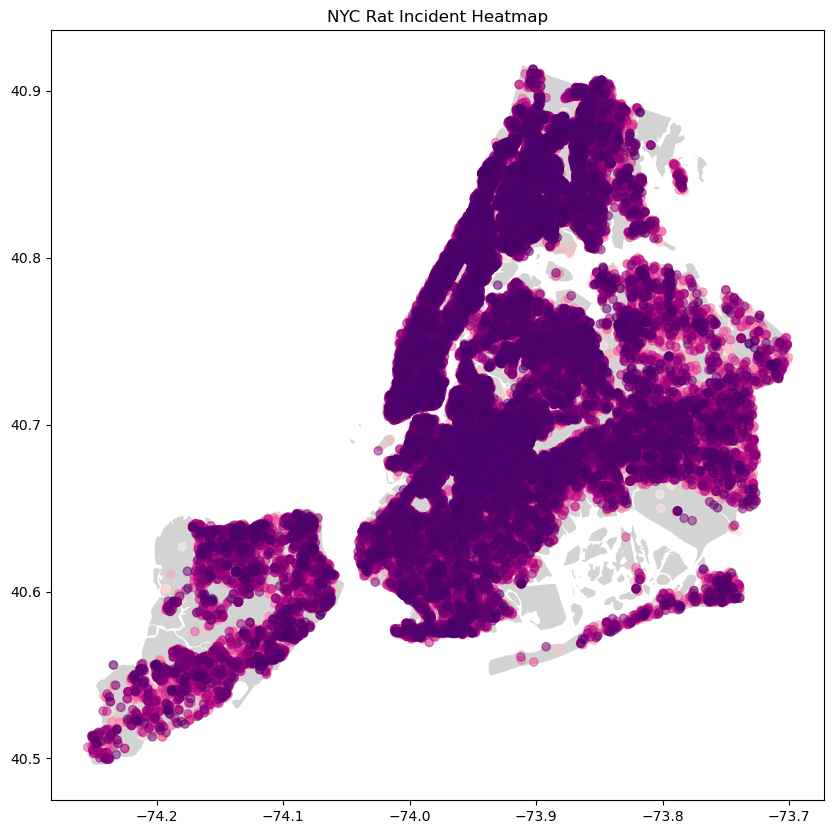

In [4]:
street_map = gpd.read_file("nyu_2451_34490")

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = ('EPSG:4326'), 
                          geometry = geometry)

fig, ax = plt.subplots(figsize = (10,10))
street_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, cmap = 'RdPu', alpha = .5)

ax.set_title('NYC Rat Incident Heatmap')

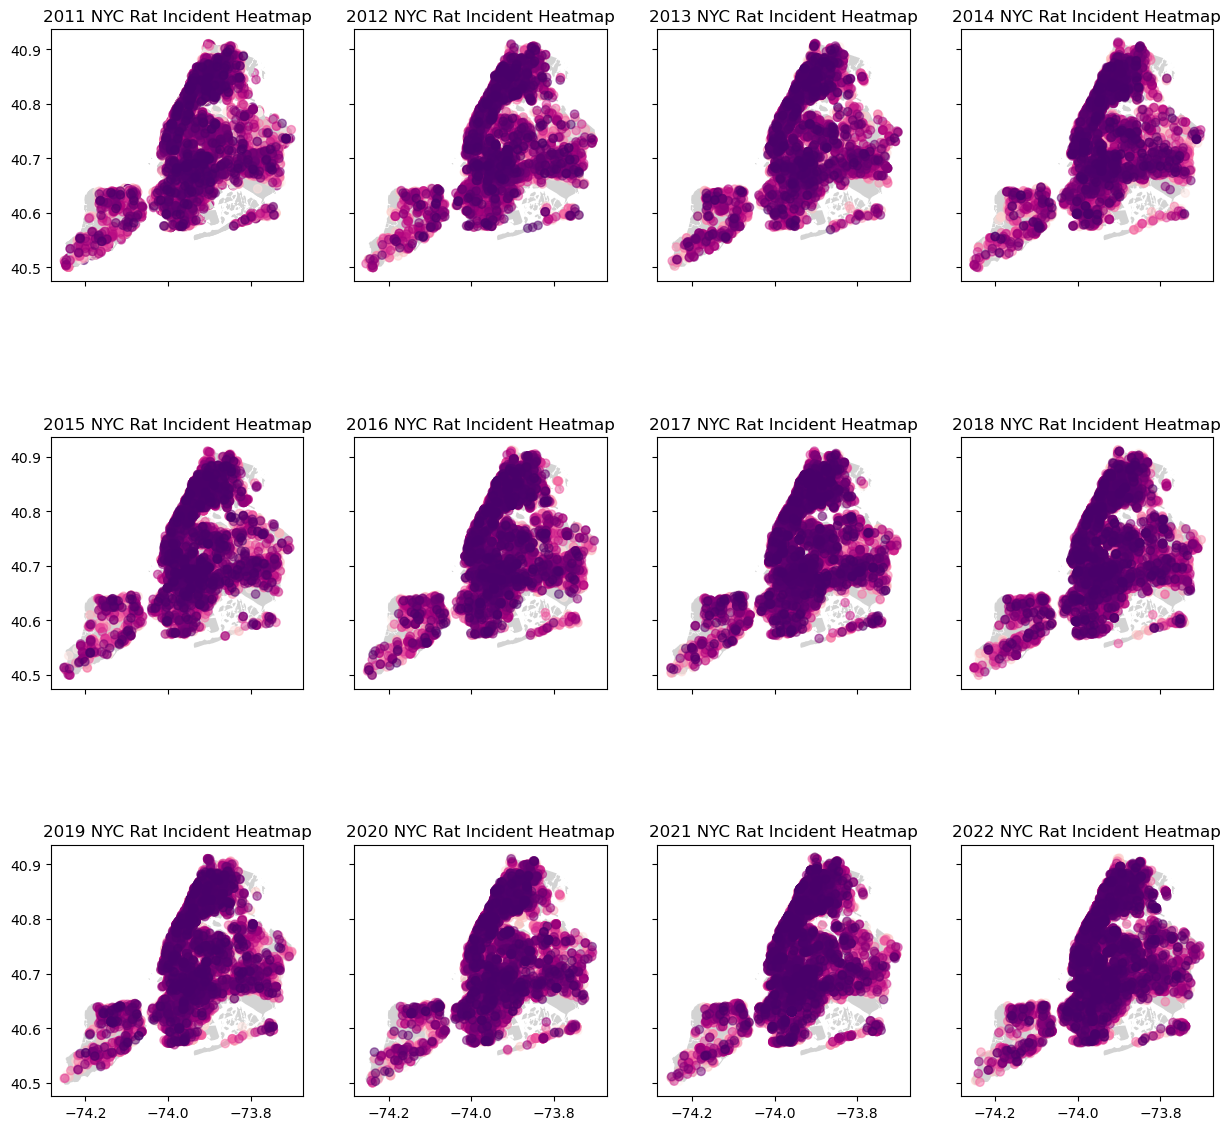

In [55]:
from datetime import datetime 

format = '%m/%d/%Y %H:%M:%S %p'
# Extracting the year and month from 'Created Date' & making their own columns
df['year'] = df['Created Date'].apply(lambda x: datetime.strptime(x, format).year)
df['month'] = df['Created Date'].apply(lambda x: datetime.strptime(x, format).month)

# The frequency array keeps track of frequency per year.
# We can use this later to make a scatter plot
frequency = []

# Each 'year' array contains:
    # index 0 ==> year_value (e.g 2011)
    # index 1 ==> array of rat sighting listings
    
# We can specify the number of columns and rows in plt.subplots to graph this in a grid format
fig, ax = plt.subplots(3, 4, figsize=(15, 15), sharex=True, sharey=True)

for year in df.groupby(['year']):
    year_freq = len(year[1])
    year_value = year[0]  
    
    # Adding the frequency for each year to an array
    frequency.append((len(year[1])))
    
    # geopandas stuff
    df_year = df[df['year'] == year[0]]
    geometry = [Point(xy) for xy in zip(df_year['Longitude'], df_year['Latitude'])]
    geo_df = gpd.GeoDataFrame(df_year, 
                          crs = ('EPSG:4326'), 
                          geometry = geometry)
    
    # Each heatmap will be plotted within a section of the grid
    # Below are the x & y values for each map
    
    # The initial values are for 2011 -> (0, 0)
    x = 0
    y = 0
    
    if year[0] == 2012:
        x = 0
        y = 1
    elif year[0] == 2013:
        x = 0
        y = 2
    elif year[0] == 2014:
        x = 0
        y = 3
    elif year[0] == 2015:
        x = 1
        y = 0
    elif year[0] == 2016:
        x = 1
        y = 1
    elif year[0] == 2017:
        x = 1
        y = 2
    elif year[0] == 2018:
        x = 1
        y = 3
    elif year[0] == 2019:
        x = 2
        y = 0
    elif year[0] == 2020:
        x = 2
        y = 1
    elif year[0] == 2021:
        x = 2
        y = 2
    elif year[0] == 2022:
        x = 2
        y = 3
    
    # Placing the map of NYC under this 
    street_map.to_crs(epsg=4326).plot(ax=ax[x,y], color='lightgrey')
    geo_df.plot(ax=ax[x,y], cmap = 'RdPu', alpha = .5)
    
    ax[x,y].set_title(str(year[0]) + ' NYC Rat Incident Heatmap')


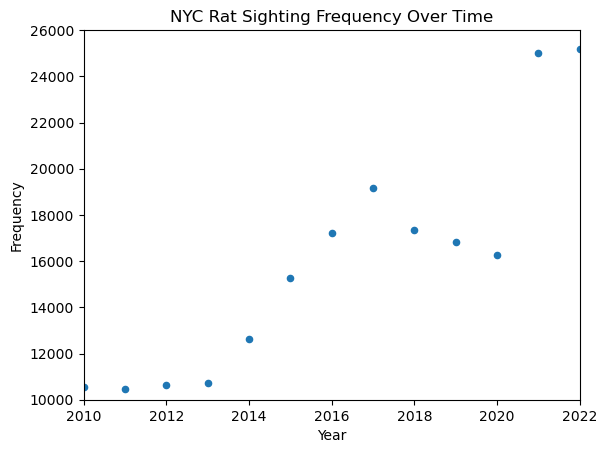

In [25]:
years = df.year.unique()
# This dataframe contains 12 rows & two columns representing # of rat sightings per year (frequency)
year_freq_df = pd.DataFrame({'years': years, 'frequency': frequency})

# Plotting the graph
graph = year_freq_df.plot.scatter('years', 'frequency') 
 
# Creating the title, limits, and labels 
graph.set_title('NYC Rat Sighting Frequency Over Time') 
graph.set_xlabel("Year")  
graph.set_ylabel("Frequency")  
 
plt.xlim(2010, 2022) 
plt.ylim(10000, 26000) 
plt.show() 

By observing the graphs visually, it seems like rat sightings are happening at the same locations at roughly the same frequency every year. It is hard to detect any variantion from a heatmap. How can we get a clearer picture of the annual rat sighting frequencies?

In [24]:
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['3+ Family Apt. Building','3+ Family Apartment Building','Apartment','3+ Family Apt.', '3+Family Apt.', '3+ Family Apt'], 'Apartment Building'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['1-3 Family Mixed Use Building', '1-2 Family Mixed Use Building', '3+ Family Mixed Use Building'], 'Mixed Use Building'))

df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['1-2 FamilyDwelling', '1-3 Family Dwelling', '1-2 Family Dwelling'], 'Family Dwelling'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Restaurant/Bar/Deli/Bakery', 'Store', 'Commercial Building', 'Catering Service', 'Retail Store', 'Restaurant', 'Grocery Store'], 'Commercial Property'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Abandoned Building', 'Vacant Building', 'Vacant Lot'], 'Vacant Lot/Property'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Street Fair Vendor', 'Ground', 'Street Area'], 'Street'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Summer Camp', 'Cafeteria - Public School', 'School/Pre-School'], 'School'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Residential Property','Residence','Private House','Single Room Occupancy (SRO)','Mixed Use Building', 'Family Dwelling', 'Apartment Building'], 'Residential Building'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Other (Explain Below)'], 'Other'))
df['Location Type'].unique()

array(['Vacant Lot/Property', 'Residential Building', 'Other',
       'Commercial Property', 'Catch Basin/Sewer', 'Public Garden',
       'Parking Lot/Garage', 'Street', 'Construction Site',
       'Government Building', 'School', 'Building (Non-Residential)',
       'Public Stairs', 'Day Care/Nursery', 'Hospital', 'Office Building',
       nan, 'Beach'], dtype=object)

Residential Building          143742
Other                          31527
Commercial Property            11042
Vacant Lot/Property             9093
Construction Site               4718
Parking Lot/Garage              2133
Catch Basin/Sewer               2069
Public Garden                    902
Government Building              464
Street                           442
School                           361
Day Care/Nursery                 219
Office Building                  193
Public Stairs                    178
Hospital                         133
Building (Non-Residential)        23
Beach                              2
Name: Location Type, dtype: int64

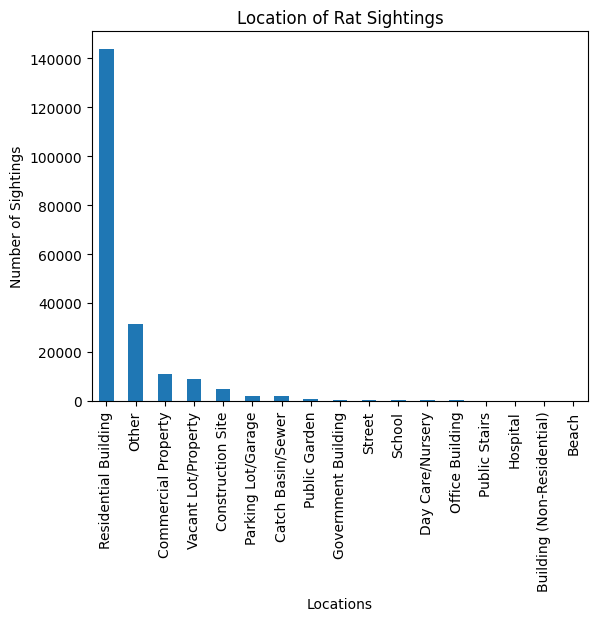

In [63]:
#Location of sightings
ax = df['Location Type'].value_counts().plot(kind='bar', title='Location of Rat Sightings')
ax.set_xlabel("Locations")
ax.set_ylabel("Number of Sightings")

df['Location Type'].value_counts()

C:\Users\lvb41\AppData\Local\Temp\ipykernel_20936\2071868773.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for year in df.groupby(['year']):


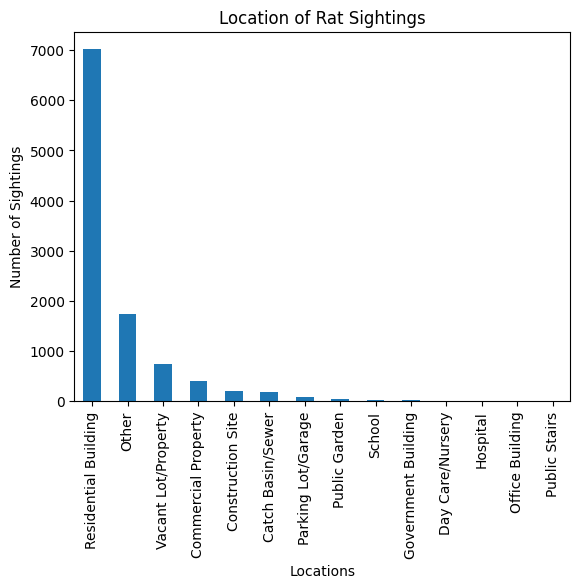

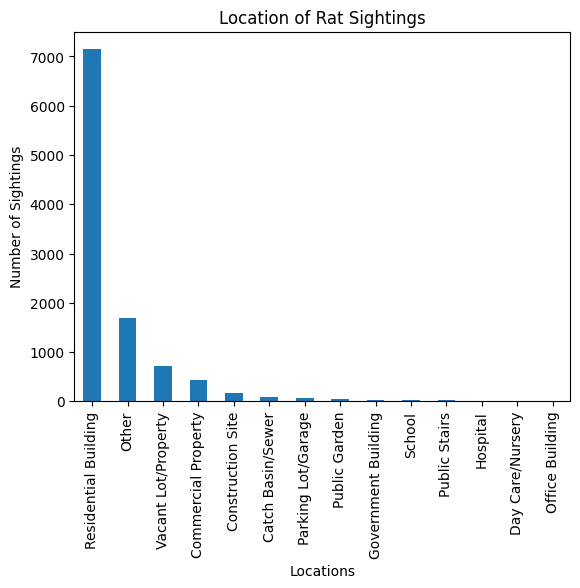

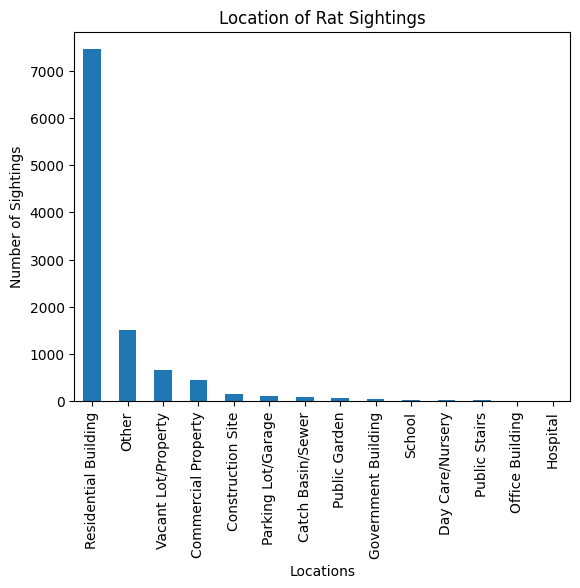

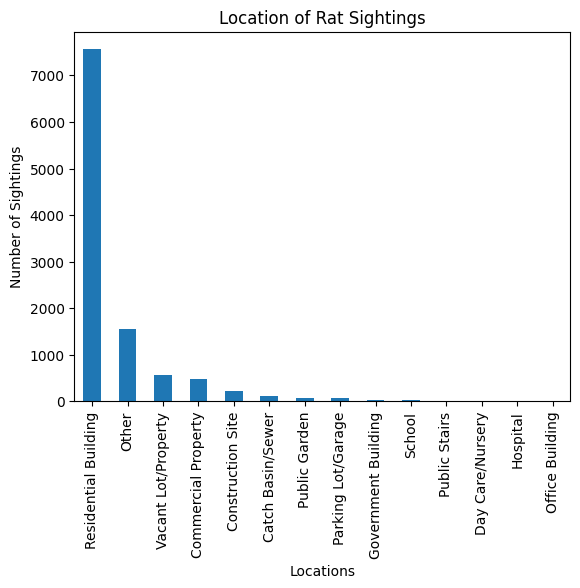

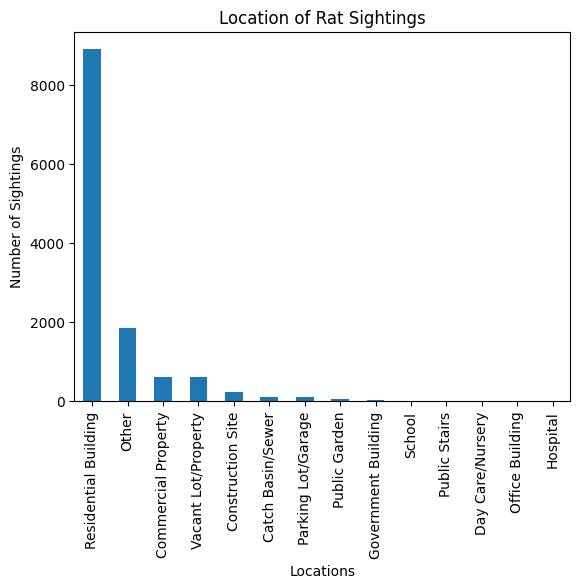

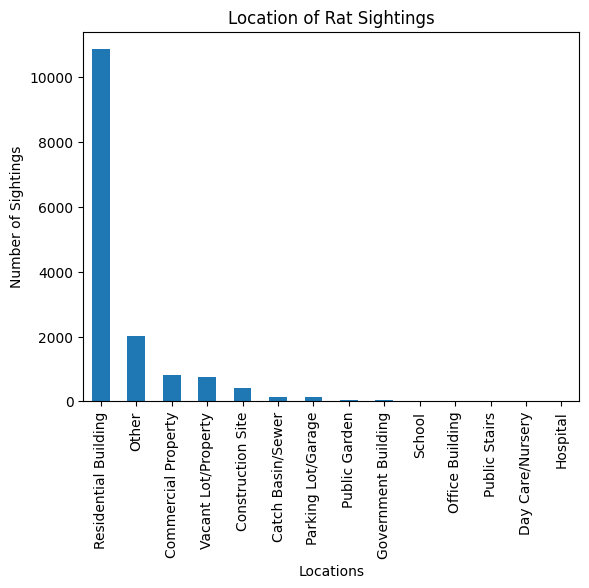

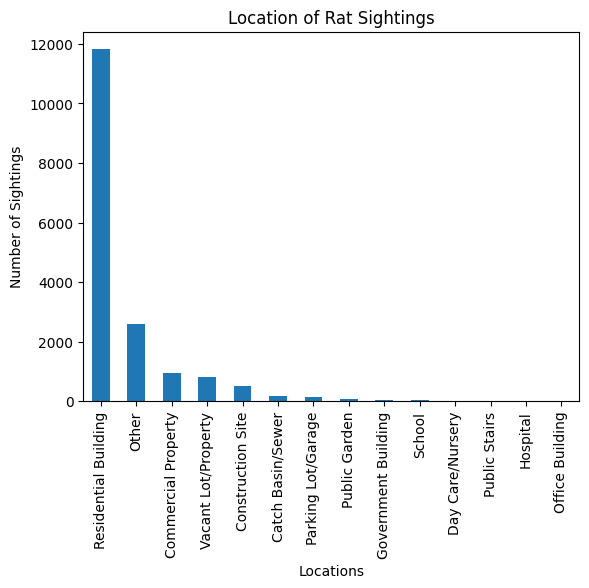

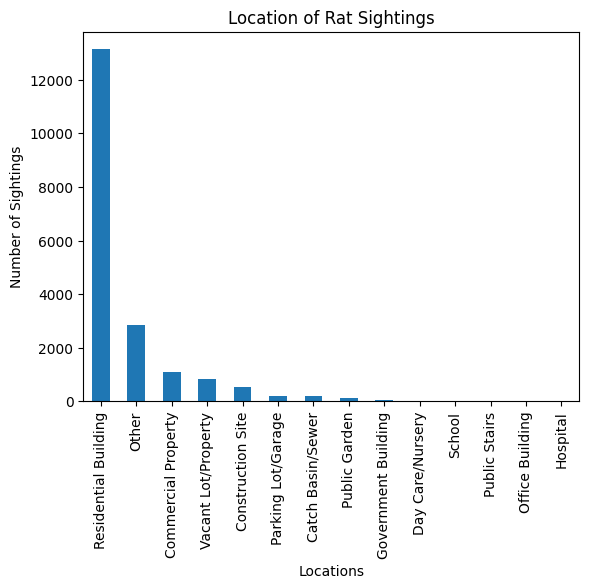

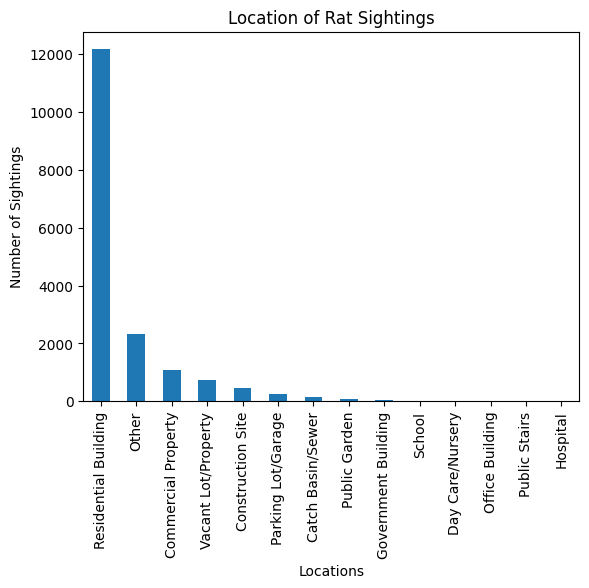

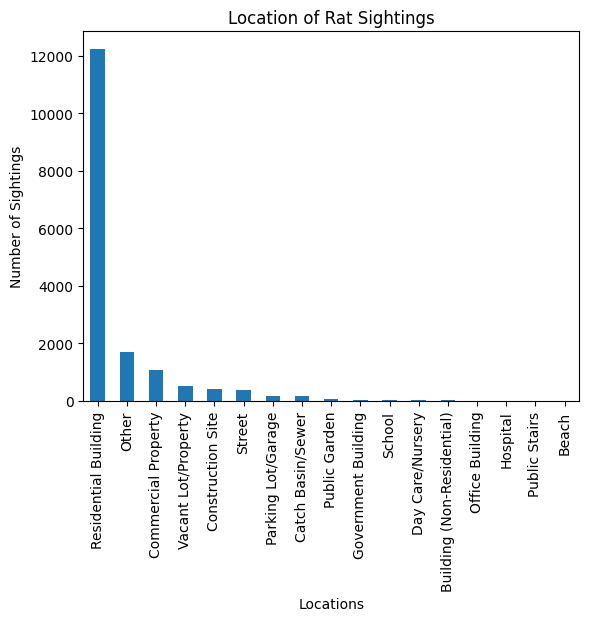

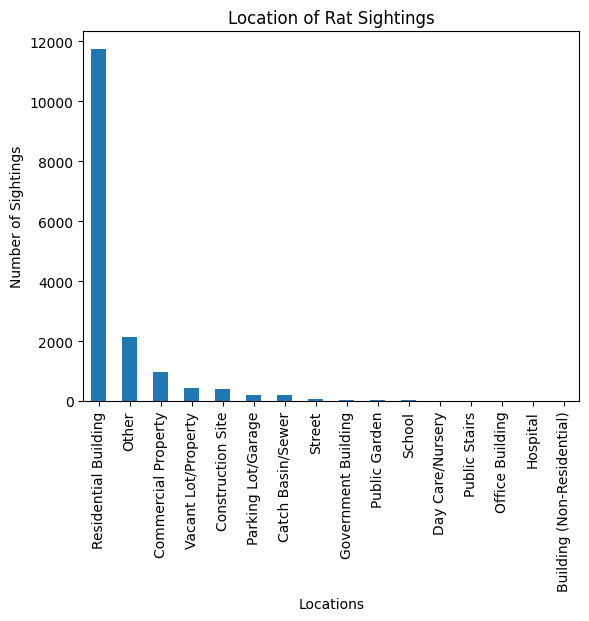

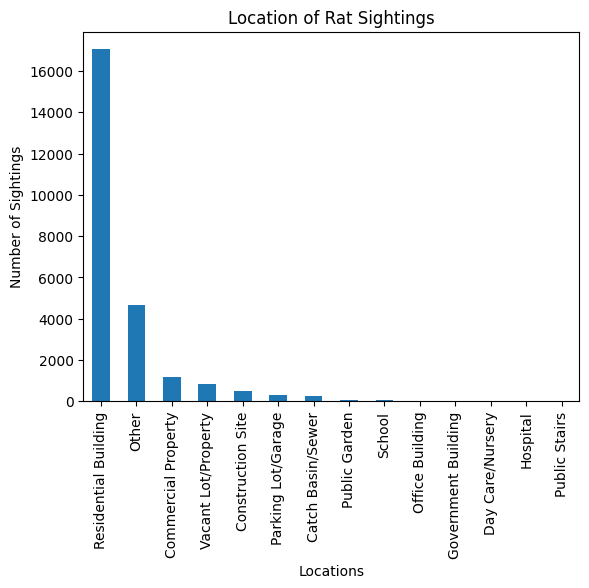

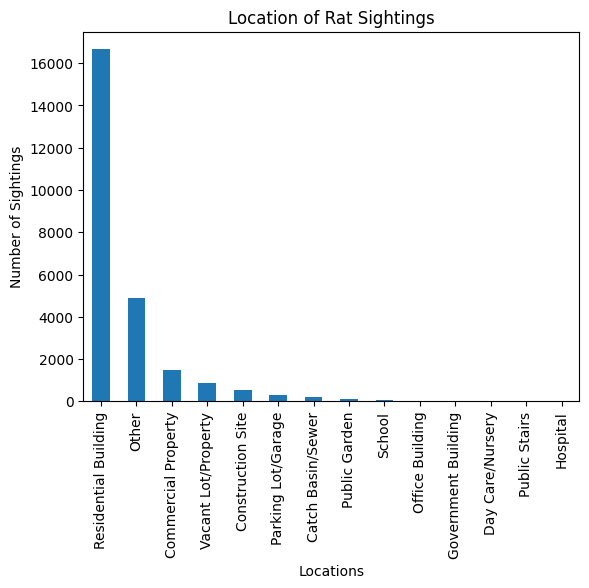

In [62]:
for year in df.groupby(['year']):
    df_year = df[df['year'] == year[0]]
    ax = df_year['Location Type'].value_counts().plot(kind='bar', title='Location of Rat Sightings')
    ax.set_xlabel("Locations")
    ax.set_ylabel("Number of Sightings")
    plt.show()

7     23082
8     22672
6     22316
5     21285
9     20273
10    18993
4     17016
3     14911
11    13352
1     11612
2     11485
12    10256
Name: month, dtype: int64

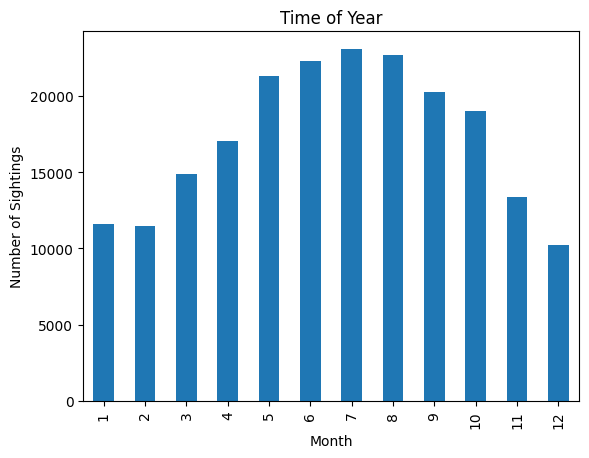

In [68]:
ax = df['month'].value_counts().sort_index().plot(kind='bar', title='Time of Year')
ax.set_xlabel("Month")
ax.set_ylabel("Number of Sightings")
df['month'].value_counts()

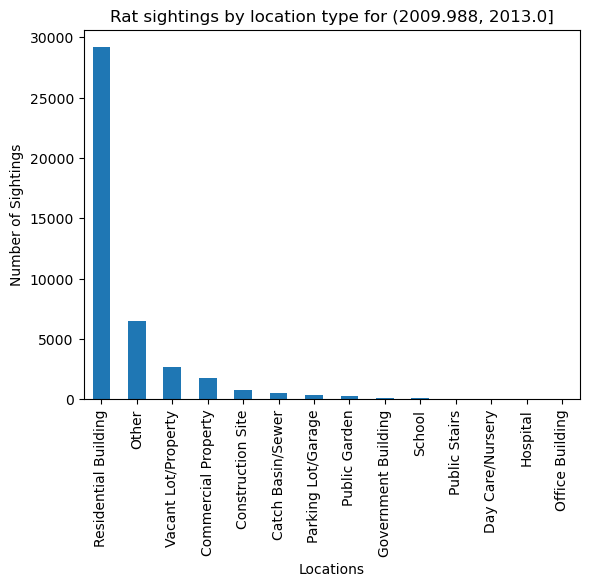

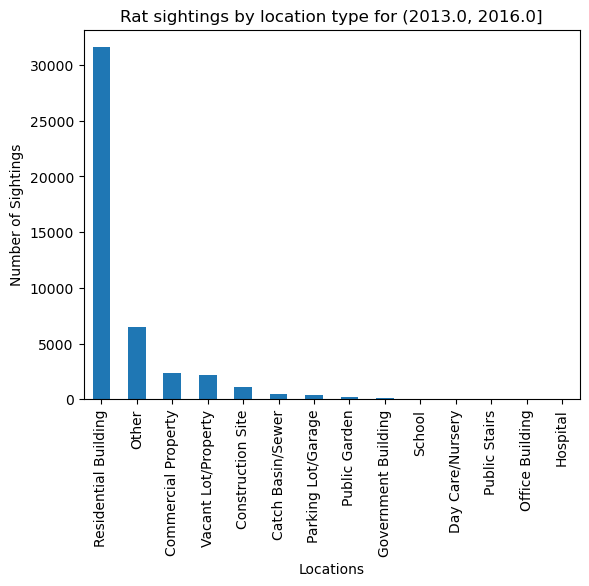

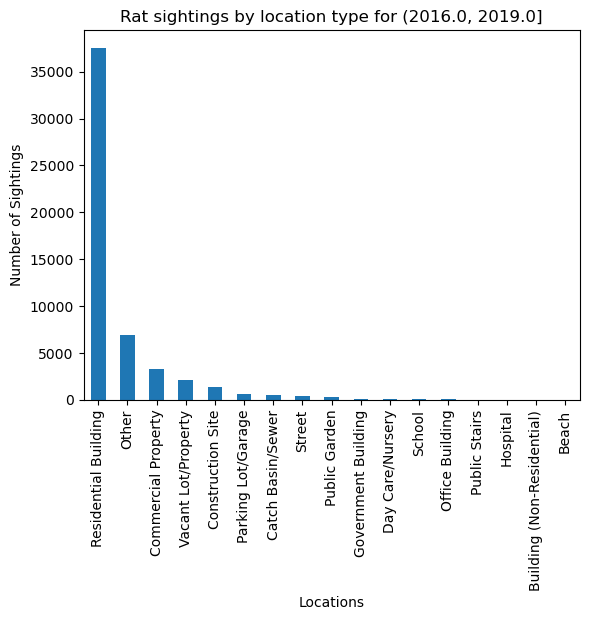

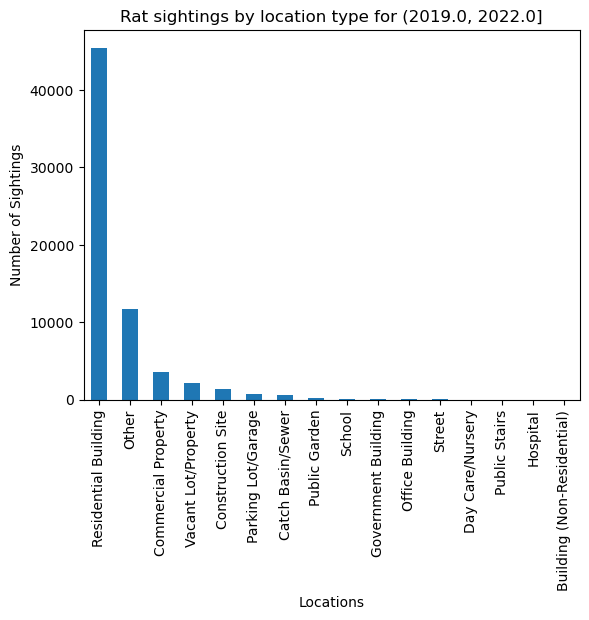

In [58]:
df['Time Group'] = pd.cut(df['year'], 4)
df['Time Group'].unique()

for years, group in df.groupby('Time Group'):
    ax = group['Location Type'].value_counts().plot(kind='bar')
    ax.set_xlabel("Locations")
    ax.set_ylabel("Number of Sightings")
    ax.set_title('Rat sightings by location type for ' + str(years))
    plt.show()

7     23082
8     22672
6     22316
5     21285
9     20273
10    18993
4     17016
3     14911
11    13352
1     11612
2     11485
12    10256
Name: month, dtype: int64

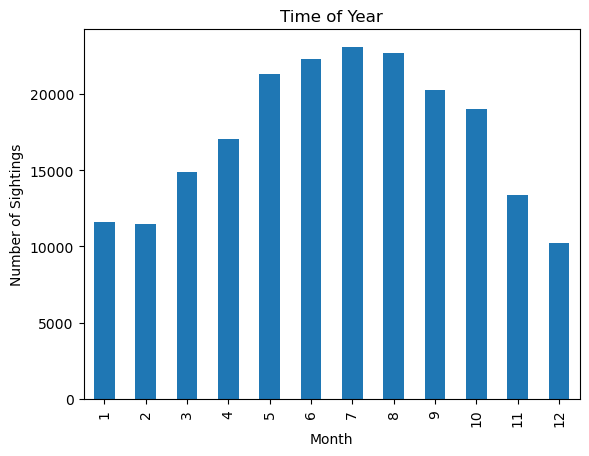

In [57]:
ax = df['month'].value_counts().sort_index().plot(kind='bar', title='Time of Year')
ax.set_xlabel("Month")
ax.set_ylabel("Number of Sightings")
df['month'].value_counts()
